# Principal Component Analysis

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.DataFrame([[2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1],[2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9]]).T

In [ ]:
df

0    1
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9

## Step 1: Calculate Covariance Matrix

In [ ]:
df.cov()

0         1
0  0.616556  0.615444
1  0.615444  0.716556

## Step 2 . Calculate Eigen Values

Then we need to calculate eigen values. 

In order to do so, we need to solve the following statement:



$\begin{bmatrix}cov(x,x) & cov(x,y)\\cov(x,y) & cov(y,y)\end{bmatrix} - \lambda \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}=0$


$\begin{bmatrix}cov(x,x) & cov(x,y)\\cov(x,y) & cov(y,y)\end{bmatrix} - \begin{bmatrix}\lambda & 0\\0 & \lambda\end{bmatrix}=0$


$\begin{bmatrix}cov(x,x)-\lambda & cov(x,y)\\cov(x,y) & cov(y,y)-\lambda\end{bmatrix} =0$


Then we need to calculate the determinant of this matrix and make it be equal to 0.

For the case of 2x2 matrix it is pretty simple:

For the matrix
$\begin{bmatrix}a & b\\c & d\end{bmatrix}$ the value of determinant is equal to $a*d-b*c$


$\begin{bmatrix}cov(x,x)-\lambda & cov(x,y)\\cov(x,y) & cov(y,y)-\lambda\end{bmatrix} =0$

$(cov(x,x)-\lambda)*(cov(y,y)-\lambda)- cov(x,y)^2=0$

So, given that covariances are constants, and $\lambda$ is variable, we need to solve the equation for $\lambda$.

$(var_x-\lambda)*(var_y-\lambda)- cov(x,y)^2=0$  
$var_x*var_y-var_x*\lambda-var_y*\lambda + \lambda^2-cov_{x,y}^2=0$

$\lambda^2-\lambda*(var_x+var_y)+(var_x*var_y-cov_{x,y}^2)=0$

In order to solve this quadratic polynom, we need to calculate the determinant of it, which is givn by the formula:

$D=b^2-4ac$ with $a,b,c$ from $ax^2+bx+c$

If $D$ is positive, you will have 2 values for $\lambda$;  
If $D$ is zero, you will have 1 value for $\lambda$;  
If $D$ is negative, no real roots will be found. (But you still can get complex roots).


So, $(var_x+var_y)^2-4(var_x*var_y-cov_{x,y}^2)$ gives you the number of roots.

In [ ]:
df.cov()

0         1
0  0.616556  0.615444
1  0.615444  0.716556

In [ ]:
def foo(x):
    return (x**2-x*(df.cov()[0][0]+df.cov()[1][1])+(df.cov()[0][0]*df.cov()[1][1]-df.cov()[0][1]**2))**2

In [ ]:
potential_values=np.linspace(-1,2,200)

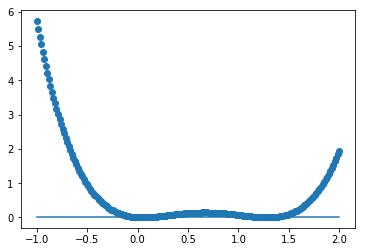

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(potential_values,foo(potential_values))
plt.plot((-1,2),(0,0))

In [ ]:
from scipy.optimize import minimize

In [ ]:
lambda1=minimize(foo, 0)

In [ ]:
lambda2=minimize(foo, 1)

In [ ]:
def foo(x):
    return x**2-x*(df.cov()[0][0]+df.cov()[1][1])+(df.cov()[0][0]*df.cov()[1][1]-df.cov()[0][1]**2)

In [ ]:
foo(lambda1.x)

array([3.24548734e-08])

In [ ]:
foo(lambda2.x)

array([1.7000122e-08])

So, we solved the equation and now we have our eigen values. Whats next?

## Step 3. Get eigen vectors

In [ ]:
df.cov()

0         1
0  0.616556  0.615444
1  0.615444  0.716556

In [ ]:
df.cov()-lambda1.x*np.identity(2)

0         1
0  0.567472  0.615444
1  0.615444  0.667472

Let v1,v2 be the values for eigen vector. Then eigen vector is given by the following equation:

$\begin{bmatrix}0.567472&0.615444\\0.615444 & 0.667472\end{bmatrix}*\begin{bmatrix}v1\\v2\end{bmatrix} =0$


$\begin{cases} 0.567472*v1+0.615444*v2=0\\0.615444*v1+ 0.667472*v2=0 \end{cases}$



Then we obtain the values for $v1,v2$. Vector $(v1,v2)$ is considered to be eigen vector of our dataset.

**Note: since we have 2 values for $\lambda$, we end up in 2 eigen vectors. We need to repeat same manipulations in order to obtain second eigen vector**

Vector generated from highest eigen value is considered to be **Principal Component #1**, from second highest - **PC2**, etc.

In [ ]:
a=np.random.random((2,2))

In [ ]:
a=a.round(2)

In [ ]:
a

array([[0.01, 0.04],
       [0.92, 0.7 ]])

In [ ]:
a @ (2*np.identity(2))

array([[0.02, 0.08],
       [1.84, 1.4 ]])

In [ ]:
np.array(((1,2),(3,4))) 

array([[1, 2],
       [3, 4]])

In [ ]:
np.array(((1,2),(3,4))) @ np.array(((0,2),(1,1)))

array([[ 2,  4],
       [ 4, 10]])

In [ ]:
df

0    1
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9

# Get data 

In [ ]:
from sklearn import datasets

In [ ]:
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
X,y=datasets.make_moons(noise=0.1)

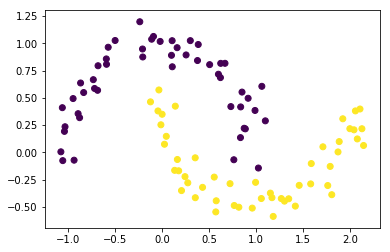

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y)

In [ ]:
datasets.make_regression()

(array([[ 1.03902648, -0.5867818 ,  1.00900579, ..., -1.18325301,
         -0.38460385,  0.23656178],
        [ 1.94678381,  0.6460202 , -1.04136696, ...,  0.7191515 ,
          1.89839444,  0.51795733],
        [-0.2184185 ,  0.18246219, -0.51717879, ..., -0.81504582,
          0.37559451,  0.13226791],
        ...,
        [-1.48824111, -1.57606639, -1.06207722, ..., -1.48414829,
          1.62207029,  2.20839384],
        [ 0.42454896,  0.97764035, -0.93104704, ...,  0.25108947,
         -0.68569788, -0.71354707],
        [-1.16093517,  1.61264932,  0.99497557, ...,  1.27537988,
         -0.71422966, -0.48823495]]),
 array([  79.12354558,   18.65324669, -123.06993651,  -62.33883371,
         277.50719595,   76.39346823,   -3.60013608,  269.96080268,
         -57.48059145,  162.58195403,   36.87392034,   16.21528335,
         -77.93172098,  293.00613212,  -34.68171402,  498.10231731,
        -190.62875853,  206.56147077, -442.08056465, -132.81923571,
          36.32840245, -194.29159

In [ ]:
datasets.fetch_openml(data_id=24)

{'data': array([[5., 2., 4., ..., 2., 3., 5.],
        [5., 2., 9., ..., 3., 2., 1.],
        [0., 2., 8., ..., 3., 2., 3.],
        ...,
        [2., 2., 4., ..., 0., 1., 2.],
        [3., 3., 4., ..., 7., 4., 2.],
        [5., 2., 4., ..., 4., 1., 2.]]),
 'target': array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object),
 'feature_names': ['cap-shape',
  'cap-surface',
  'cap-color',
  'bruises%3F',
  'odor',
  'gill-attachment',
  'gill-spacing',
  'gill-size',
  'gill-color',
  'stalk-shape',
  'stalk-root',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring',
  'stalk-color-above-ring',
  'stalk-color-below-ring',
  'veil-type',
  'veil-color',
  'ring-number',
  'ring-type',
  'spore-print-color',
  'population',
  'habitat'],
 'DESCR': "**Author**: [Jeff Schlimmer](Jeffrey.Schlimmer@a.gp.cs.cmu.edu)  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/mushroom) - 1981     \n**Please cite**:  The Audubon Society Field Guide to North American Mushrooms (1981). G. H

## Get the actual data

In [ ]:
cancer=datasets.load_breast_cancer()

In [ ]:
X=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [ ]:
y=cancer['target']

In [ ]:
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
X.describe().T

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.400000   251.20000  
worst area               515.300000  686.500000  1084.

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
knn=KNeighborsClassifier(5)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
X_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
149       13.740         17.91           88.12      585.0          0.07944   
124       13.370         16.39           86.10      553.5          0.07115   
421       14.690         13.98           98.22      656.1          0.10310   
195       12.910         16.33           82.53      516.4          0.07941   
545       13.620         23.23           87.19      573.2          0.09246   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
149           0.06376         0.02881              0.01329         0.1473   
124           0.07325         0.08092              0.02800         0.1422   
421           0.18360         0.14500              0.06300         0.2086   
195           0.05366         0.03873              0.02377         0.1829   
545           0.06747         0.02974              0.02443         0.1664   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     mean fractal dimension  ...  worst radius  worst texture  \
149                 0.05580  ...        15.340          22.46   
124                 0.05823  ...        14.260          22.75   
421                 0.07406  ...        16.460          18.34   
195                 0.05667  ...        13.880          22.00   
545                 0.05801  ...        15.350          29.09   
..                      ...  ...           ...            ...   
71                  0.08980  ...         9.733          15.67   
106                 0.06520  ...        13.140          29.26   
270                 0.05376  ...        14.910          20.65   
435                 0.06544  ...        17.040          30.80   
102                 0.05677  ...        13.340          32.84   

     worst perimeter  worst area  worst smoothness  worst compactness  \
149            97.19       725.9           0.09711            0.18240   
124            91.99       632.1           0.10250            0.25310   
421           114.10       809.2           0.13120            0.36350   
195            90.81       600.6           0.10970            0.15060   
545            97.58       729.8           0.12160            0.15170   
..               ...         ...               ...                ...   
71             62.56       284.4           0.12070            0.24360   
106            85.51       521.7           0.16880            0.26600   
270            94.44       684.6           0.08567            0.05036   
435           113.90       869.3           0.16130            0.35680   
102            84.58       547.8           0.11230            0.08862   

     worst concavity  worst concave points  worst symmetry  \
149          0.15640               0.06019          0.2350   
124          0.33080               0.08978          0.2048   
421          0.32190               0.11080          0.2827   
195          0.17640               0.08235          0.3024   
545          0.10490               0.07174          0.2642   
..               ...                   ...             ...   
71           0.14340               0.04786         

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 57,   6],
       [  1, 107]], dtype=int64)

In [ ]:
tn,fn,fp,tp=confusion_matrix(y_test, y_pred).ravel()

# Same with Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
knn=KNeighborsClassifier(5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [ ]:
pca=PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_.round(2)

array([0.98, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

We can see that the first column dragged all the variance, and we end up with only 2 components from PCA. 

This situation is a problem, taking into account that our dataset is not standardized, because the features with high variance are considered to be in 1st component, while features with low variance end up in ones with low explained variance, therefore will be dropped. **We need to standardize our dataset before applying PCA**.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train1=scaler.transform(X_train)

In [ ]:
X_train1.shape

(398, 30)

In [ ]:
X_train.shape

(398, 30)

In [ ]:
pca=PCA()
pca.fit(X_train1)
pca.explained_variance_ratio_.round(2)

array([0.43, 0.2 , 0.1 , 0.07, 0.05, 0.04, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
#specify the number of components to be used
pca=PCA(2)
pca.fit(X_train1)
pca.explained_variance_ratio_.round(2)

array([0.43, 0.2 ])

In [ ]:
#specify the minimal total explained variance ratio to be considered
pca=PCA(0.85)
pca.fit(X_train1)
pca.explained_variance_ratio_.round(2)

array([0.43, 0.2 , 0.1 , 0.07, 0.05, 0.04])

In [ ]:
# lambdas
pca.singular_values_.shape[0]

6

In [ ]:
X_pca=pd.DataFrame(pca.transform(X_train1), columns=[f'PC{i}' for i in range(pca.singular_values_.shape[0])])

In [ ]:
X_pca

PC0       PC1       PC2       PC3       PC4       PC5
0   -3.084842 -2.158704 -0.339875 -0.216630  1.545359  0.258008
1   -2.182647 -0.617571  0.447208 -0.150818  2.860346 -0.353044
2    2.049959  2.328953  1.169407 -1.814647 -0.115599  0.280841
3   -2.809267 -0.950791 -0.305102 -0.380816  0.547114  1.202716
4   -1.913537 -1.072582  0.498365  1.311554 -0.204212  0.064969
..        ...       ...       ...       ...       ...       ...
393 -0.307514  7.375943  3.928696 -2.654496  2.060507 -1.338530
394 -0.686019  1.889553 -0.622723  0.650350 -1.027044 -1.513335
395 -4.553716 -3.144000 -0.021237 -0.375321  1.382337  1.036213
396  0.720424  0.547831 -2.748877  0.688838  0.083803 -1.115289
397 -3.419369 -1.339703 -0.007964  1.884641 -0.015786  0.241195

[398 rows x 6 columns]

In [ ]:
knn1=KNeighborsClassifier(5)
knn1.fit(X_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Small summary:
1. Split data into train/test
2. Standardize train
3. Build PCA with 85% explained variance ratio
4. Build KNN

## Testing time

Testing procedure:
1. Apply scaler that was trained on train dataset to test dataset
2. Apply PCA that was trained on train dataset to test scaled test dataset
3. Apply KNN on test dataset

In [ ]:
X_test1=scaler.transform(X_test)

In [ ]:
((X_train['mean radius']-X_train['mean radius'].mean())/X_train['mean radius'].std()).head()

149   -0.123335
124   -0.227981
421    0.145351
195   -0.358081
545   -0.157274
Name: mean radius, dtype: float64

In [ ]:
X_train1[:5,0]

array([-0.12348985, -0.22826757,  0.14553402, -0.35853176, -0.15747182])

In [ ]:
((X_test['mean radius']-X_train['mean radius'].mean())/X_train['mean radius'].std()).head()

204   -0.482525
70     1.347366
131    0.363128
431   -0.502323
540   -0.745554
Name: mean radius, dtype: float64

In [ ]:
X_test1[:5,0]

array([-0.48313229,  1.34906186,  0.36358494, -0.5029551 , -0.7464925 ])

In [ ]:
X_test_pca=pd.DataFrame(pca.transform(X_test1), columns=[f'PC{i}' for i in range(pca.singular_values_.shape[0])])

In [ ]:
y_pred_PCA=knn1.predict(X_test_pca)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 57,   6],
       [  1, 107]], dtype=int64)

In [ ]:
confusion_matrix(y_test, y_pred_PCA)

array([[ 59,   4],
       [  3, 105]], dtype=int64)